Data: https://www.kaggle.com/datasets/kimjmin/seoul-metro-usage

# **목표: 시간대별 지하철 이용자 수 예측 **

목차:  
0. 라이브러리 호출  
1. 파일 입력  
2. 데이터 정제  
2-1. 키 값 확인  
2-2. 역 메타데이터 정리 (중복 열 제거)  
2-3. 로그 데이터 정리  
2-4. Null값 확인  
2-4-1. 역 메타데이터의 Null값 확인  
2-4-2. 로그 데이터의 Null값 확인  
2-4-2-1. 로그 데이터 속 Null 값 확인  
2-4-2-2. Null 값 없애기  
2-5. 의미있는 정보 만들기  
3. 데이터 시각화  
  3.1. 데이터 히트맵

# 0. 라이브러리 호출 #

In [67]:
import pandas as pd

# 1. 파일 입력 #

In [68]:
!dir

sample_data


In [69]:
df_logs_2015 = pd.read_csv("/content/sample_data/seoul-metro-2015.logs.csv")
df_logs_2016 = pd.read_csv("/content/sample_data/seoul-metro-2016.logs.csv")
df_logs_2017 = pd.read_csv("/content/sample_data/seoul-metro-2017.logs.csv")
df_logs_2018 = pd.read_csv("/content/sample_data/seoul-metro-2018.logs.csv")
df_logs_2019 = pd.read_csv("/content/sample_data/seoul-metro-2019.logs.csv")
df_logs_2020 = pd.read_csv("/content/sample_data/seoul-metro-2020.logs.csv")
df_logs_2021 = pd.read_csv("/content/sample_data/seoul-metro-2021.logs.csv")
df_station_info = pd.read_csv("/content/sample_data/seoul-metro-station-info.csv")

# 2. 데이터 정제

## 2-1. 키 값 확인

In [70]:
df_station_info.keys()

Index(['station.code', 'station.fr_code', 'line.num', 'line.name',
       'line.name_sub', 'line.station_seq', 'station.name_full',
       'station.name', 'station.name_chc', 'station.name_chn',
       'station.name_en', 'station.name_jp', 'geo.latitude', 'geo.longitude',
       'geo.sigungu_code', 'geo.sigungu_name', 'geo.addres_road',
       'geo.address_land', 'geo.phone'],
      dtype='object')

In [71]:
df_logs_2021.keys()

Index(['timestamp', 'station_code', 'people_in', 'people_out'], dtype='object')

## df_station_info의 키 값
station.code : 역 번호  
station.fr_code: ??  
line.num: 호선 번호  
line.name: 호선 이름  
line.name_sub: 호선 이름  
line.station_seq: 호선별 번호  
station.name_full: 역 이름(전체)  
station.name: 역 이름  
station.name_chc: 역 이름(한자)  
station.name_chn: 역 이름(중국어)  
station.name_en: 역 이름(영어)  
station.name_jp: 역 이름(일본어)  
geo.latitude: 위도  
geo.longitude: 경도  
geo.sigungu_code: 역이 속해있는 구 번호  
geo.sigungu_name: 역이 속해있는 구 이름  
geo.address_road: 도로명 주소  
geo.address_land: 지명 주소  
geo.phone: 역 전화번호  
  
## df_logs의 키 값  
timestamp: 시간  
station_code: 역 번호(df_station_info와 연결)  
people_in: 들어온 사람 수  
people_out: 나간 사람 수  

## 2-2. 역 메타데이터 정리 (중복 열 제거)

### *Idea-1) 역 이름(전체), 역 이름, 역 이름(중국어), 역 이름(한자), 역 이름(영어), 역 이름(일본어),는 모두 같은 항목이다.*  
### *Solution-1) 따라서 역 이름을 제외하고 제거해준다.*

In [72]:
df_station_info.drop(columns=['station.name_chc'],inplace=True)
df_station_info.drop(columns=['station.name_chn'],inplace=True)
df_station_info.drop(columns=['station.name_jp'],inplace=True)
df_station_info.drop(columns=['station.name_en'],inplace=True)
df_station_info.drop(columns=['station.name_full'],inplace=True)

### *Idea-2) 호선 번호, 호선 이름, 호선 번호는 모두 같은 항목이다.*  
### *Solution-2) 따라서 호선 번호를 제외하고 제거해준다.*

In [73]:
df_station_info.drop(columns=['line.name'],inplace=True)
df_station_info.drop(columns=['line.name_sub'],inplace=True)

### *Idea-3) 역이 속해있는 구 번호와 역이 속해있는 구 이름은 같은 항목이다.*  
### *Solution-3) 따라서 역이 속해있는 구 이름을 제외하고 제거해준다.*

In [74]:
df_station_info.drop(columns=['geo.sigungu_code'],inplace=True)

### *Idea-4) 호선별 번호, 위도, 경도, 도로명 주소, 지명 주소, 역 전화번호는 데이터의 목적과 부합하지 않는다.*  
### *Solution-4) 따라서 해당하는 모든 열을 제거한다.*

In [75]:
df_station_info.drop(columns=['line.station_seq'],inplace=True) # inplace=True를 넣어줘야 원본 df가 바뀌는 구나
df_station_info.drop(columns=['geo.latitude'],inplace=True)
df_station_info.drop(columns=['geo.longitude'],inplace=True)
df_station_info.drop(columns=['geo.addres_road'],inplace=True)
df_station_info.drop(columns=['geo.address_land'],inplace=True)
df_station_info.drop(columns=['geo.phone'],inplace=True)

In [76]:
df_station_info

,station.code,station.fr_code,line.num,station.name,geo.sigungu_name
0,158,124,1,청량리|서울시립대입구,동대문구
1,157,125,1,제기동,동대문구
2,156,126,1,신설동,동대문구
3,159,127,1,동묘앞,종로구
4,155,128,1,동대문,종로구
...,...,...,...,...,...
280,2823,823,8,남한산성입구|성남법원|검찰청,성남시수정구
281,2824,824,8,단대오거리,성남시수정구
282,2825,825,8,신흥,성남시수정구
283,2826,826,8,수진,성남시수정구


## 중복 열을 제거하고 지하철 메타데이터의 남은 키 값은 다음과 같다.
station.code : 역 번호  
station.fr_code: ??  
line.num: 호선 번호    
station.name: 역 이름  
geo.sigungu_name: 역이 속해있는 구 이름  

## 2-3. 로그 데이터 정리

In [77]:
year_list = ["2015","2016","2017","2018","2019","2020","2021"]

In [78]:
df_list = []
for i in range(len(year_list)):
  df_list.append(globals()["df_logs_"+year_list[i]]) #globals() 함수를 통해 df를 리스트에 담을 수 있구나

### *Idea-1) 시간대 별 예측을 위한 데이터에 일자 정보는 필요 없다. 그리고 시간 정보는 시간으로 정확히 나누어 떨어진다.*  
### *Solution-1) timestamp열을 시간 값을 제외하고 지우자*

In [79]:
for df in df_list:
  df['timestamp']=df['timestamp'].str[11:13]

In [80]:
df_logs_2018.tail()

,timestamp,station_code,people_in,people_out
1048570,15,226,1821,2093.0
1048571,16,226,1937,2779.0
1048572,17,226,2646,NaN
1048573,18,226,3857,6477.0
1048574,19,226,2630,5921.0


### *Idea-2) 나가는 사람의 수는 소수점일 수 없다.*  
### *Solution-2) people_out열을 정수형으로 반환하자*

In [81]:
for df in df_list:
  df['people_out']=df['people_out'].astype(int).astype(str)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### *Idea-2-1) 그러나 위 코드는 정상 작동하지 못한다. -> Null값이 포함되어 있기 때문*  
### *Solution-2-1) 예외처리를 해주자*

In [82]:
for df in df_list:
  try:
    df['people_out']=df['people_out'].astype(int).astype(str) # df에서 astype(자료형)을 쓰면 해당 자료형으로 저장해주는구나
  except:
    pass

In [83]:
df_logs_2018

,timestamp,station_code,people_in,people_out
0,05,150,373,205.0
1,06,150,318,1040.0
2,07,150,365,872.0
3,08,150,785,984.0
4,09,150,1047,1650.0
...,...,...,...,...
1048570,15,226,1821,2093.0
1048571,16,226,1937,2779.0
1048572,17,226,2646,NaN
1048573,18,226,3857,6477.0


### *Idea-2-2) 에러는 나지 않으나, 결과에 반영이 되지 않는다. 함수는 df 전체에 대해서 일괄 적용하는데, try-except로 해서 df 중 하나라도 걸리면 except로 넘어가기 때문*  
### *Solution-2-2) Null값 처리를 해주자*

## 2-4. Null값 확인

### 2-4-1. 역 메타데이터의 Null값 확인

In [84]:
null_counts = df_station_info.isnull().sum() # .isnull().sum()를 쓰면 nan값이 있는 행의 개수를 반환하는구나
print(null_counts)

station.code        0
station.fr_code     0
line.num            0
station.name        0
geo.sigungu_name    0
dtype: int64


### 2-4-2. 로그 데이터의 Null값 확인

In [85]:
for i in range(len(df_list)):
  null_counts = df_list[i].isnull().sum()
  print(year_list[i])
  print(null_counts)
  print()

2015
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2016
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2017
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2018
timestamp       0
station_code    0
people_in       0
people_out      1
dtype: int64

2019
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2020
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2021
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64



### 2-4-2-1. 로그 데이터 속 Null 값 확인



In [86]:
df_logs_2018[df_logs_2018['people_out'].isna()] # .isna()를 쓰면 nan값이 있는 행만 반환하는구나

,timestamp,station_code,people_in,people_out
1048572,17,226,2646,NaN


### 2-4-2-2. Null 값 없애기

### *Idea-1) 시간대별 평균값은 같지 않을까?*  
### *Solution-1) 동시간대 나간 사람 수의 평균으로 대체해주자*

In [92]:
avg_2018_out = df_logs_2018[df_logs_2018['timestamp']=="08"]['people_out'].mean()

In [93]:
df_logs_2018.at[1048572,'people_out'] = avg_2018_out # iloc은 접근하고, 새로운 df를 반환하기 때문에 at을 써줘야 하는구나. at(행 번호, 열 이름)

In [94]:
df_logs_2018.loc[1048572]

timestamp                17
station_code            226
people_in              2646
people_out      1984.309066
Name: 1048572, dtype: object

In [95]:
for i in range(len(df_list)):
  null_counts = df_list[i].isnull().sum()
  print(year_list[i])
  print(null_counts)
  print()

2015
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2016
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2017
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2018
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2019
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2020
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64

2021
timestamp       0
station_code    0
people_in       0
people_out      0
dtype: int64



In [96]:
for df in df_list:
  df['people_out']=df['people_out'].astype(int).astype(str)

In [97]:
df_logs_2018.head()

,timestamp,station_code,people_in,people_out
0,05,150,373,205
1,06,150,318,1040
2,07,150,365,872
3,08,150,785,984
4,09,150,1047,1650


## 2-5. 의미있는 정보 만들기

### *Idea-1) 이용자 수는 나간 사람과 들어온 사람의 합이다.*  
### *Solution-1) people_in과 people_out을 합친 새로운 열을 만들어주자*

In [98]:
for i in range(len(df_list)):
  df_list[i]['people_sum'] = df_list[i]['people_in'].astype(int)+df_list[i]['people_out'].astype(int)

In [99]:
df_logs_2015.tail()

,timestamp,station_code,people_in,people_out,people_sum
2007495,20,2827,262,167,429
2007496,21,2827,168,172,340
2007497,22,2827,167,130,297
2007498,23,2827,73,102,175
2007499,00,2827,42,235,277


### *Idea-2) 같은 시간대, 같은 station_code별로 people_sum을 합쳐보자*  
### *Solution-2) groupby함수를 사용해서 묶어주자*

In [100]:
new_df = []
for year in year_list:
    new_df.append("new_df_"+year)

In [101]:
for i in range(len(new_df)):
    globals()[new_df[i]] = df_list[i].groupby(['timestamp','station_code'])['people_sum'].sum().reset_index() #reset_index를 해야 인덱스 재설정으로 새로운 df가 예쁘게 생성

# 3. 데이터 시각화

## 3.1 사용자 수 히트맵

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
plt.rcParams['figure.figsize'] = [12,8]

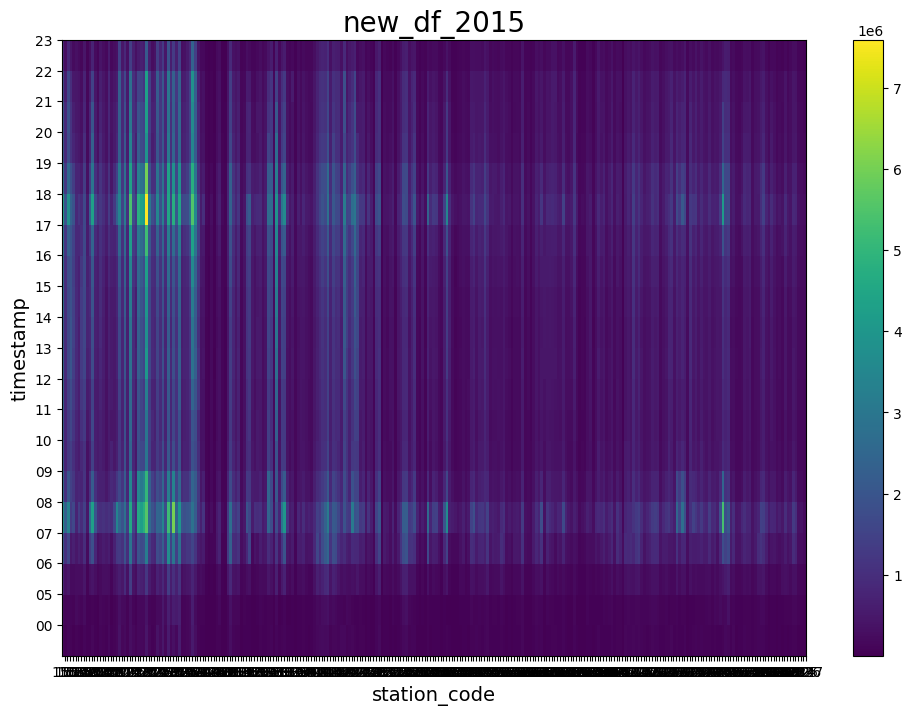

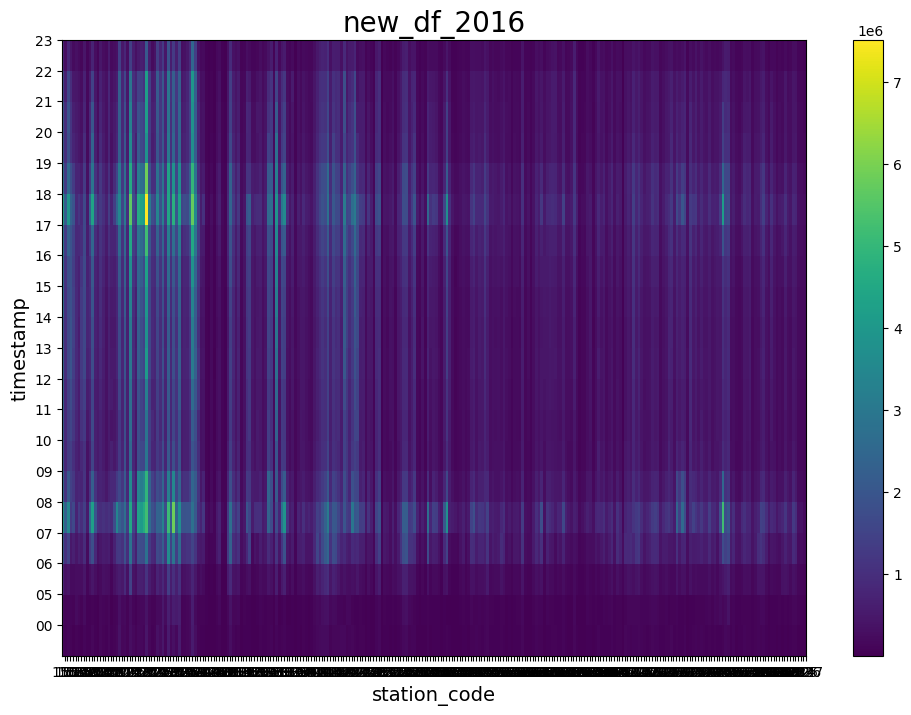

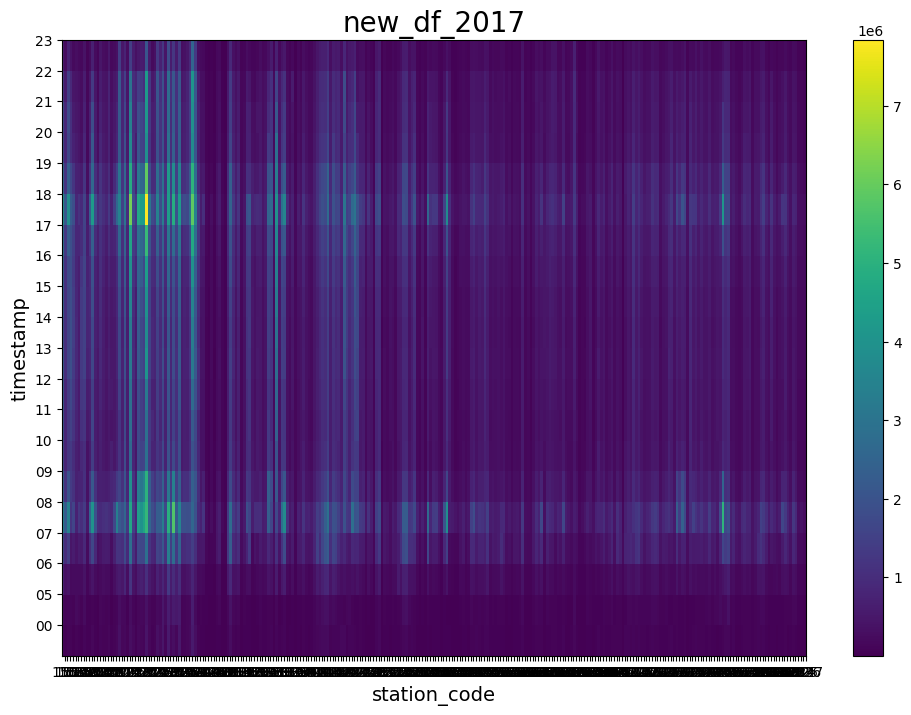

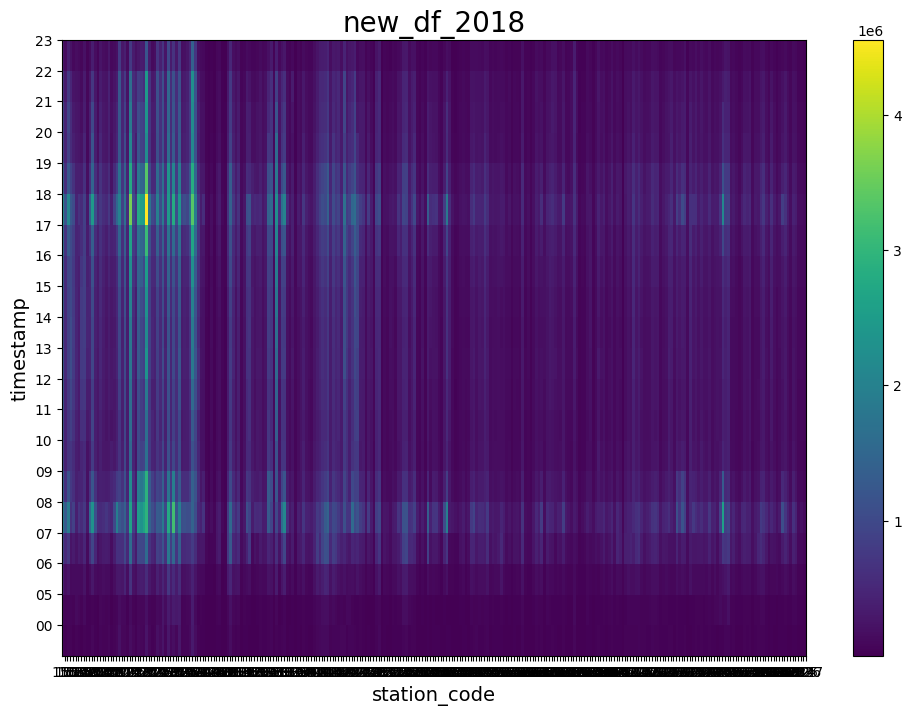

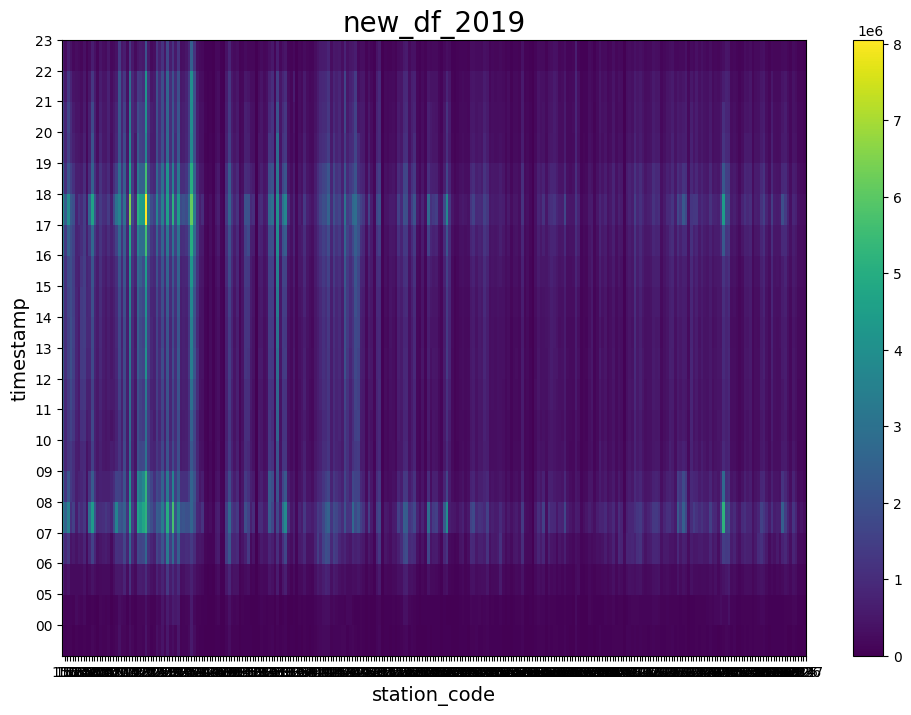

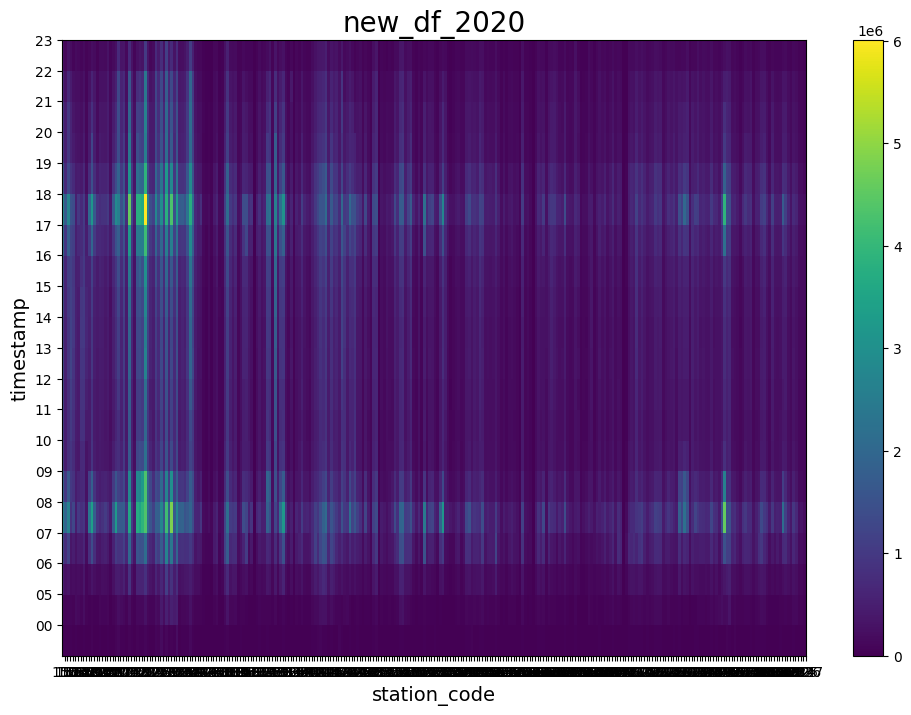

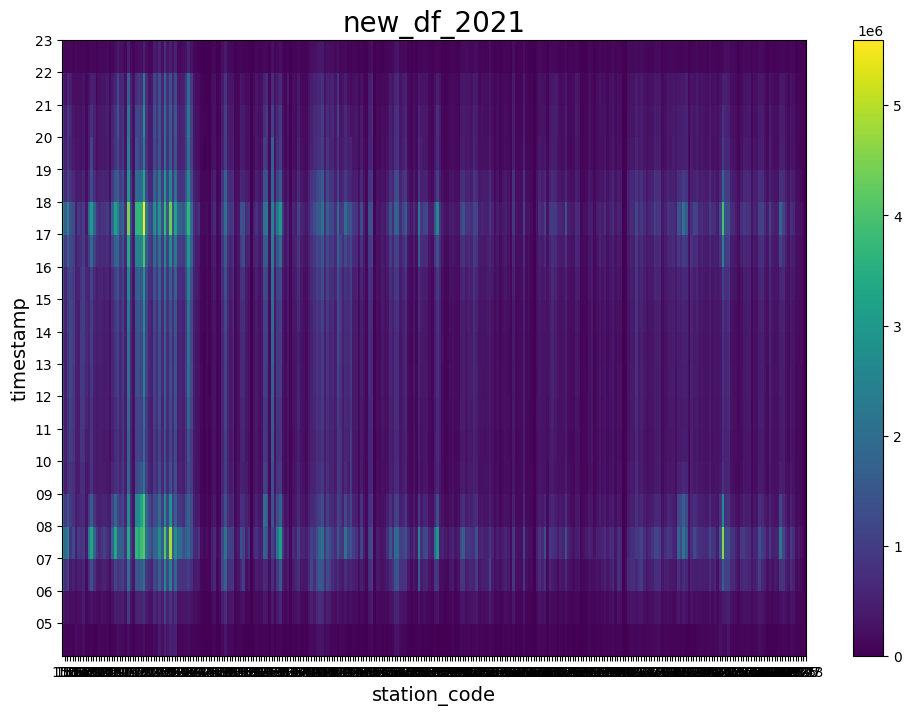

In [104]:
for i in range(len(new_df)):
    df = globals()[new_df[i]].pivot(index='timestamp', columns='station_code', values='people_sum')
    plt.pcolor(df)
    plt.xticks(np.arange(1, len(df.columns)+1), df.columns) # matplotlib은 눈금의 위치가 1부터 시작
    plt.yticks(np.arange(1, len(df.index)+1), df.index)
    plt.title(new_df[i], fontsize=20)
    plt.xlabel('station_code', fontsize=14)
    plt.ylabel('timestamp', fontsize=14)
    plt.colorbar()
    plt.show()


# 알게된 사실
1. inplace=True를 넣어줘야 원본 df가 바뀜
2. globals() 함수를 통해 df를 리스트에 담을 수 있음
3. df에서 astype(자료형)을 쓰면 해당 자료형으로 저장
4. .isnull().sum()를 쓰면 nan값이 있는 행의 개수를 반환
5. .isna()를 쓰면 nan값이 있는 행만 반환
6. iloc은 접근하고, 새로운 df를 반환하기 때문에 at을 써줘야 함. at(행 번호, 열 이름)
7. 여러 개의 df global() 써서 동시에 다루기
8. matplotlib은 눈금의 위치가 1부터 시작
9. 히트맵 그리는 방법

# 궁금한 점
1. global()을 줄일 순 없을까?
2. 3차원 데이터를 좀 더 효율적으로 표현하는 방법은 없을까?


# 추가적으로 했으면 좋았을 Task
1. 요일별 정리
2. 메타 데이터 활용 방안
3. 어떤 역이 붐비는지 (총합 일정 범위 이하의 방문객들을 보유한 역의 행을 제거)